In [93]:
# path = "/content/img3.png"
path = "../Images/image-1.jpg" # VS CODE 

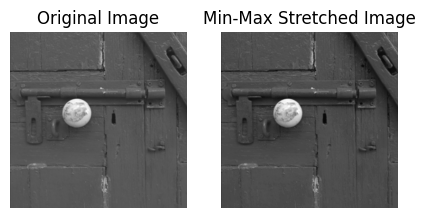

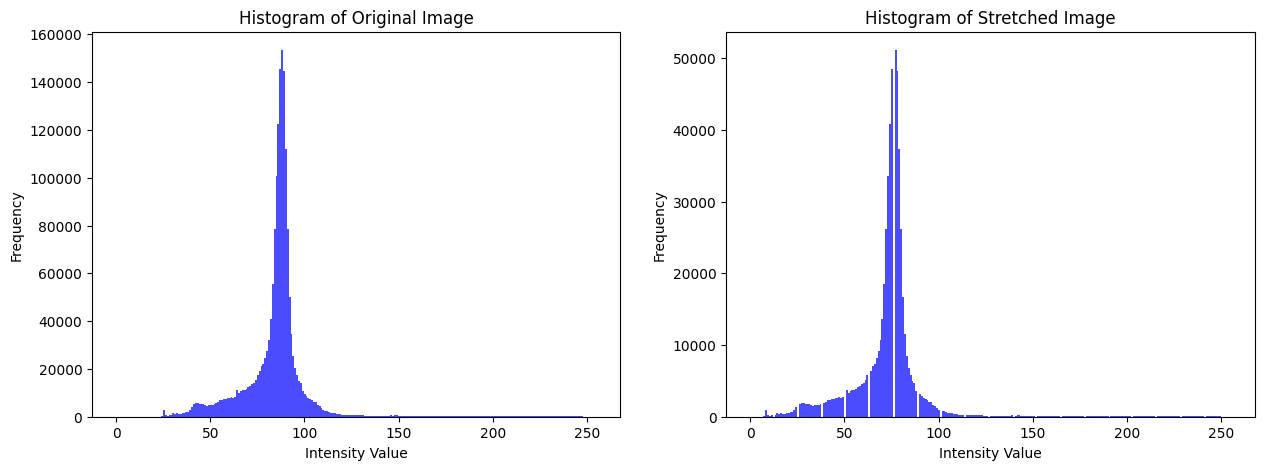

In [104]:
def min_max_stretching(image):
    # Convert the image to grayscale if it's in color
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate minimum and maximum intensity values
    min_val = np.min(image)
    max_val = np.max(image)

    # Perform min-max stretching
    stretched_image = ((image - min_val) / (max_val - min_val)) * 255
    stretched_image = np.clip(stretched_image, 0, 255).astype(np.uint8)

    return stretched_image

# Load image
image = cv2.imread(path)

# Apply min-max stretching
min_max_stretched_image = min_max_stretching(image)

# Plot histograms
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(min_max_stretched_image, cmap='gray')
plt.title('Min-Max Stretched Image')
plt.axis('off')
plt.show()

print()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(image.flatten(), bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.title('Histogram of Original Image')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(min_max_stretched_image.flatten(), bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.title('Histogram of Stretched Image')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

---
### Percentage Linear Stretching
---

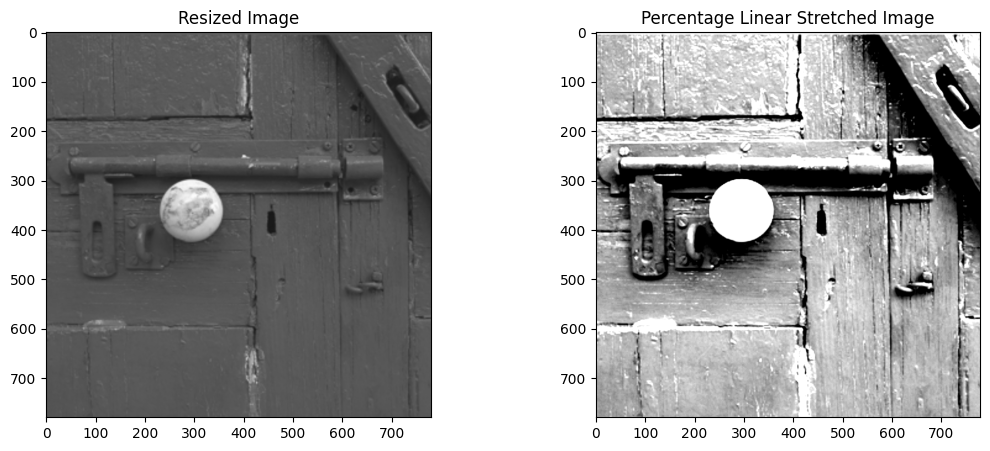

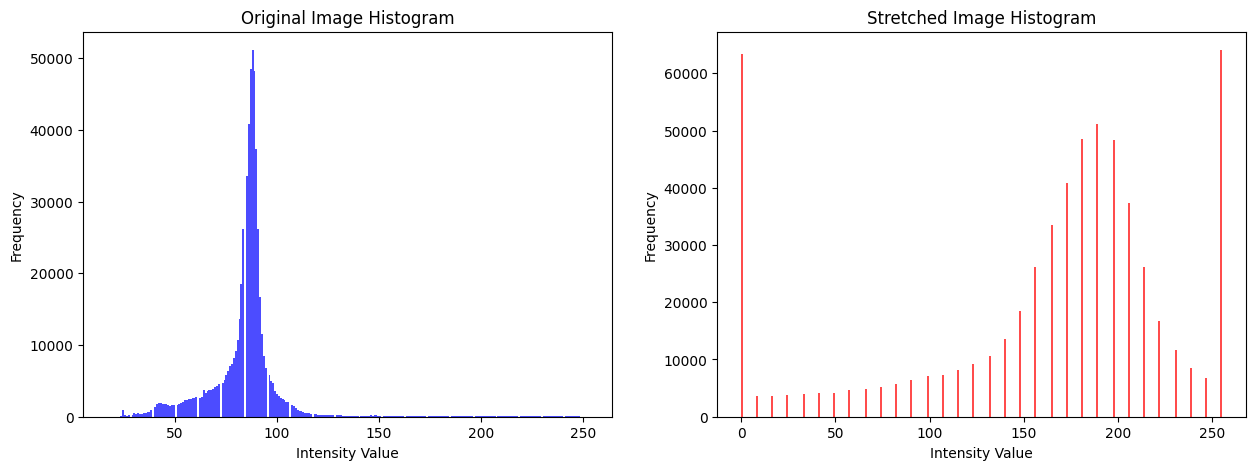

In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def percentage_linear_stretching(image, percent):
    # Calculate minimum and maximum intensity values
    min_val = np.min(image)
    max_val = np.max(image)

    # Calculate lower and upper percentile values
    lower_percentile = np.percentile(image, percent)
    upper_percentile = np.percentile(image, 100 - percent)

    # Perform PLS
    stretched_image = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] < lower_percentile:
                stretched_image[i, j] = 0
            elif image[i, j] > upper_percentile:
                stretched_image[i, j] = 255
            else:
                stretched_image[i, j] = ((image[i, j] - lower_percentile) / (upper_percentile - lower_percentile)) * 255

    return stretched_image

# Load image
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Apply percentage linear stretching with 10% of intensity range
percent_linear_stretched_image = percentage_linear_stretching(image, 10)

plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')

plt.subplot(1, 2, 2)
plt.imshow(percent_linear_stretched_image, cmap='gray')
plt.title('Percentage Linear Stretched Image')

plt.show()

print()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(image.flatten(), bins=256, color='blue', alpha=0.7)
plt.title('Original Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(percent_linear_stretched_image.flatten(), bins=256, color='red', alpha=0.7)
plt.title('Stretched Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

---
### Stretching Non Zero Brightness Value
---

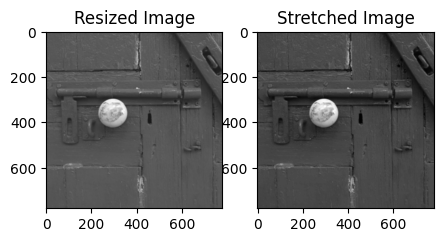

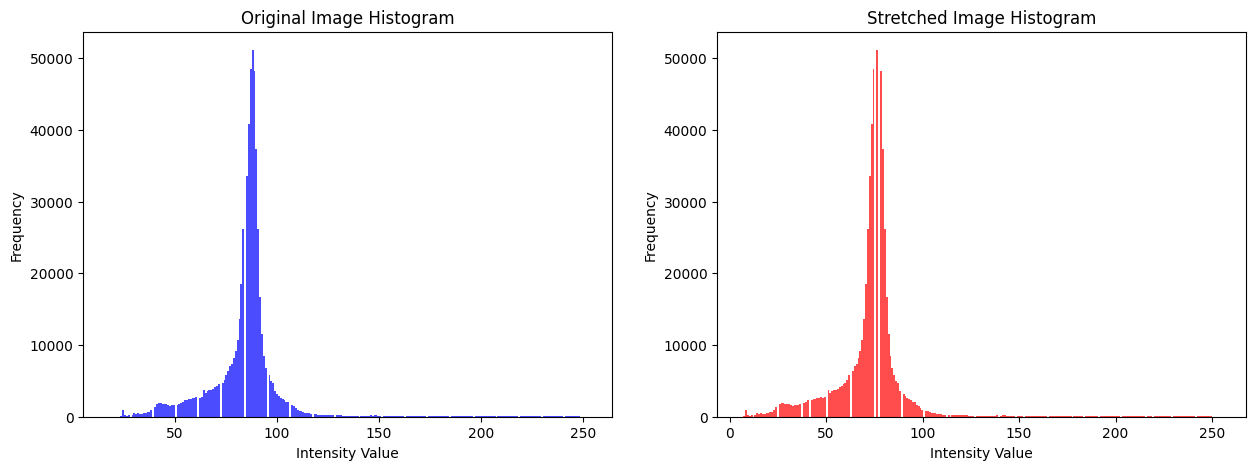

In [106]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def stretch_nonzero_brightness(image):
    # Find the minimum nonzero intensity
    min_nonzero_intensity = np.min(image[np.nonzero(image)])

    # Perform contrast stretching for nonzero brightness pixels
    stretched_image = np.where(image > min_nonzero_intensity,
                                ((image - min_nonzero_intensity) / (np.max(image) - min_nonzero_intensity)) * 255,
                                image)

    # Clip values to ensure they are within valid range
    stretched_image = np.clip(stretched_image, 0, 255).astype(np.uint8)

    return stretched_image

# Load image
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Apply proposed stretching for nonzero brightness
stretched_non_zero_brightness_image = stretch_nonzero_brightness(image)

# Display images side by side
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')

plt.subplot(1, 2, 2)
plt.imshow(stretched_non_zero_brightness_image, cmap='gray')
plt.title('Stretched Image')

plt.show()

print()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(image.flatten(), bins=256, color='blue', alpha=0.7)
plt.title('Original Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(stretched_non_zero_brightness_image.flatten(), bins=256, color='red', alpha=0.7)
plt.title('Stretched Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

When we perform contrast stretching (or stretching the intensity range) on an image, we aim to enhance its contrast by stretching the range of pixel intensities. This typically involves mapping the original intensity values to a wider range of values.

In the proposed stretching for nonzero brightness, the focus is on stretching the intensity range while excluding the darkest pixels (i.e., pixels with zero brightness). This can be particularly useful in scenarios where the image contains a significant portion of dark pixels that we don't want to include in the stretching process.

---
### Piecewise Linear Shifting
---

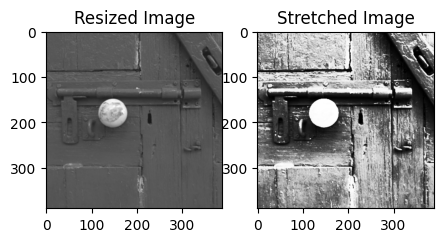

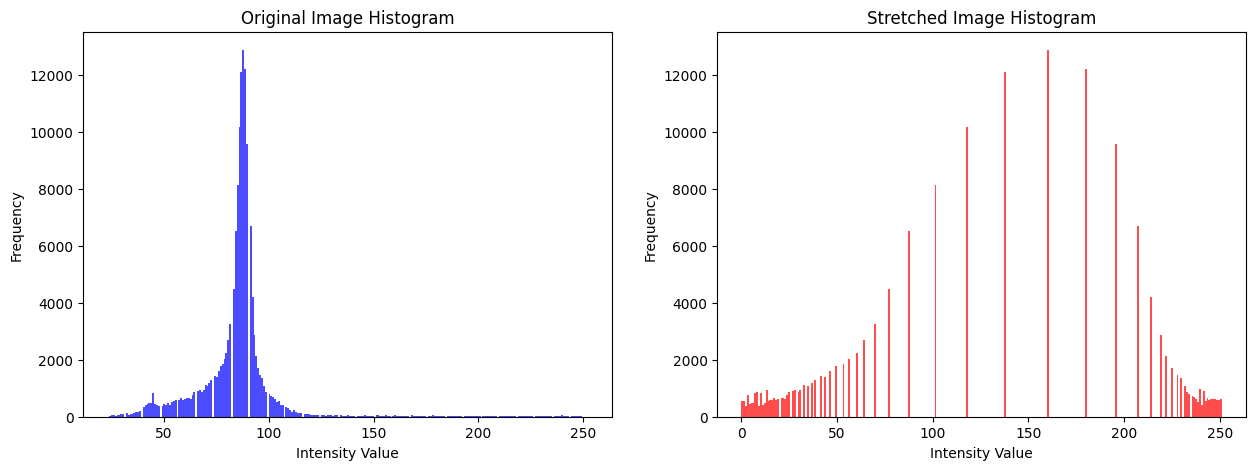

In [107]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def piecewise_linear_stretching(image):
    image_copy = image.copy()

    max_intensity_value = np.max(image)

    image = np.sort(image.flatten())
    image_intensity_freq = {}

    # Initialize frequency counts for each intensity value
    for intensity in image:
        image_intensity_freq[intensity] = 0

    # Update frequency counts
    for intensity in image:
        image_intensity_freq[intensity] += 1

    # print(image_intensity_freq)
    prob = []
    for intensity, freq in image_intensity_freq.items():
      prob.append(round(freq/len(image), 5))

    # print(prob)
    cdf = [0] * len(prob)

    for i in range(len(prob)):
      if i > 0:
        cdf[i] = prob[i] + cdf[i - 1]
      else:
        cdf[i] = prob[i]

    # print(cdf)


    for i in range(len(cdf)):
      cdf[i] = cdf[i] * max_intensity_value

    # print(cdf)

    i = 0
    for intensity, freq in image_intensity_freq.items():
      image_intensity_freq[intensity] = cdf[i]
      i = i + 1

    # print(image_intensity_freq)

    for i in range(image_copy.shape[0]):
      for j in range(image_copy.shape[1]):
        image_copy[i][j] = image_intensity_freq[image_copy[i][j]]

    return image_copy

# Load image
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

image = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2))

# Apply piecewise-linear stretching
picewise_linear_stretched_image = piecewise_linear_stretching(image)

plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')

plt.subplot(1, 2, 2)
plt.imshow(picewise_linear_stretched_image, cmap='gray')
plt.title('Stretched Image')

plt.show()

print()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(image.flatten(), bins=256, color='blue', alpha=0.7)
plt.title('Original Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(picewise_linear_stretched_image.flatten(), bins=256, color='red', alpha=0.7)
plt.title('Stretched Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

---
### Global Histogram Equalization
---

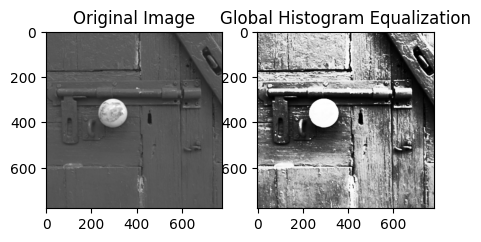

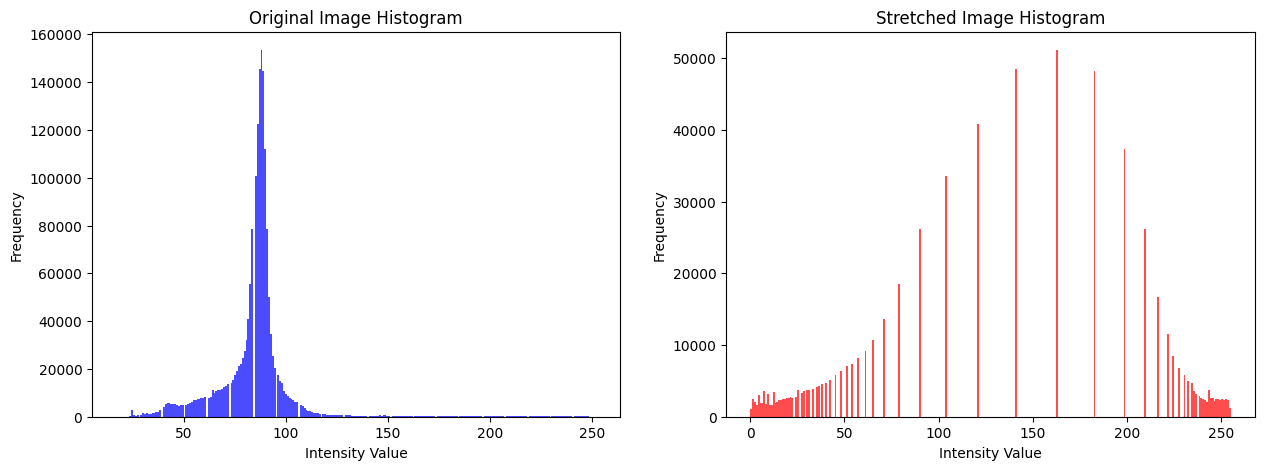

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for global histogram equalization
def global_histogram_equalization(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

# Load image
image = cv2.imread(path)

# Apply global histogram equalization
equalized_image_global = global_histogram_equalization(image)

# Display original and equalized images
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_global, cmap='gray')
plt.title('Global Histogram Equalization')

plt.show()

print()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(image.flatten(), bins=256, color='blue', alpha=0.7)
plt.title('Original Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(equalized_image_global.flatten(), bins=256, color='red', alpha=0.7)
plt.title('Stretched Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

---
### Clipped Histogram Equalization
---

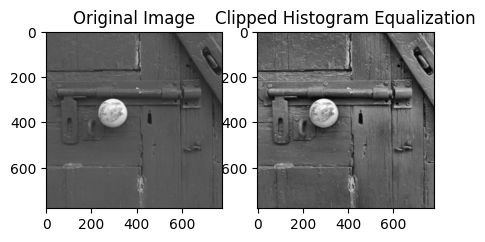

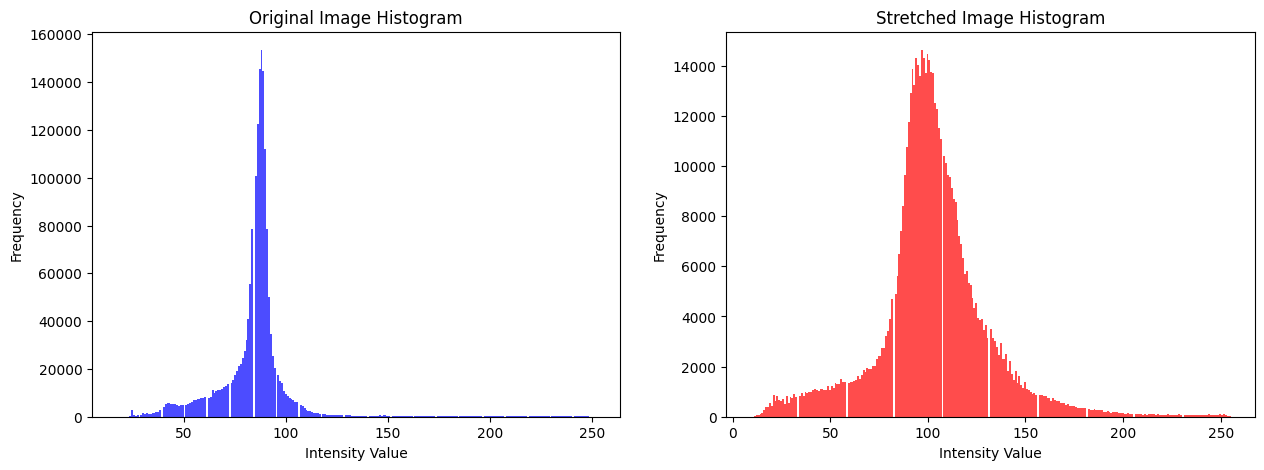

In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for clipped histogram equalization
def clipped_histogram_equalization(image, clip_limit=2.0):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create CLAHE (Contrast Limited Adaptive Histogram Equalization) object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8, 8))

    # Apply CLAHE
    equalized_image_clipped = clahe.apply(image)
    return equalized_image_clipped

# Load image
image = cv2.imread(path)

# Apply clipped histogram equalization
equalized_image_clipped = clipped_histogram_equalization(image)

# Display original and equalized images
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_clipped, cmap='gray')
plt.title('Clipped Histogram Equalization')

plt.show()

print()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(image.flatten(), bins=256, color='blue', alpha=0.7)
plt.title('Original Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(equalized_image_clipped.flatten(), bins=256, color='red', alpha=0.7)
plt.title('Stretched Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

---
### Power Law Histogram Equalization
---

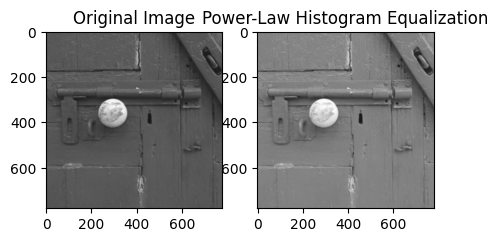

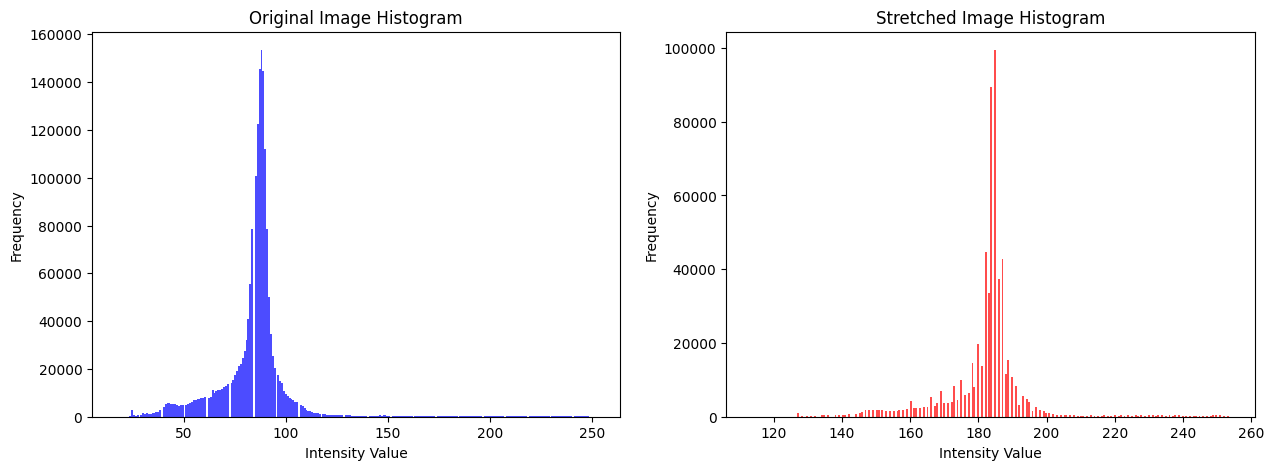

In [110]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for power-law histogram equalization
def power_law_histogram_equalization(image, gamma=0.5):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize the image
    normalized_image = image / 255.0

    # Apply power-law transformation
    equalized_image_power_law = np.power(normalized_image, gamma)

    # Denormalize the image
    equalized_image_power_law = (equalized_image_power_law * 255).astype(np.uint8)

    return equalized_image_power_law

# Load image
image = cv2.imread(path)

# Apply power-law histogram equalization
equalized_image_power_law = power_law_histogram_equalization(image, gamma=0.3)

# Display original and equalized images
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_power_law, cmap='gray')
plt.title('Power-Law Histogram Equalization')

plt.show()

print()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(image.flatten(), bins=256, color='blue', alpha=0.7)
plt.title('Original Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(equalized_image_power_law.flatten(), bins=256, color='red', alpha=0.7)
plt.title('Stretched Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()